In [37]:
import requests
import json
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt

In [38]:
api_key = "22647af51e59672c106531a133f87c5d"

In [39]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"

header_info = {'user-agent': user_agent, 'referer': None}

In [40]:
url_tpl = "http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key={key}&targetDt={date}"

In [41]:
today = dt.datetime.now()
delta = dt.timedelta(days = -1)
yesterday = today + delta
yesterday_str = yesterday.strftime("%Y%m%d")
yesterday_str

'20211130'

In [42]:
api_url = url_tpl.format(key=api_key, date=yesterday_str)
api_url

'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=22647af51e59672c106531a133f87c5d&targetDt=20211130'

In [43]:
r = requests.get(api_url, headers=header_info)

if r.status_code != 200:
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    raise Exception(err_msg)

r.encoding = "utf-8"
r.text

'{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20211130~20211130","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20196264","movieNm":"유체이탈자","openDt":"2021-11-24","salesAmt":"382428760","salesShare":"33.7","salesInten":"42584450","salesChange":"12.5","salesAcc":"4254060700","audiCnt":"41614","audiInten":"5577","audiChange":"15.5","audiAcc":"440071","scrnCnt":"1125","showCnt":"4679"},{"rnum":"2","rank":"2","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20205986","movieNm":"연애 빠진 로맨스","openDt":"2021-11-24","salesAmt":"233389420","salesShare":"20.5","salesInten":"7533900","salesChange":"3.3","salesAcc":"2571445990","audiCnt":"23749","audiInten":"1166","audiChange":"5.2","audiAcc":"255396","scrnCnt":"902","showCnt":"3428"},{"rnum":"3","rank":"3","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20210864","movieNm":"엔칸토: 마법의 세계","openDt":"2021-11-24","salesAmt":"159226120","salesShare":"14.0","salesInten":"5599640","salesChange":

In [44]:
daily_boxoffice_dict = json.loads(r.text)
daily_boxoffice_dict

{'boxOfficeResult': {'boxofficeType': '일별 박스오피스',
  'showRange': '20211130~20211130',
  'dailyBoxOfficeList': [{'rnum': '1',
    'rank': '1',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20196264',
    'movieNm': '유체이탈자',
    'openDt': '2021-11-24',
    'salesAmt': '382428760',
    'salesShare': '33.7',
    'salesInten': '42584450',
    'salesChange': '12.5',
    'salesAcc': '4254060700',
    'audiCnt': '41614',
    'audiInten': '5577',
    'audiChange': '15.5',
    'audiAcc': '440071',
    'scrnCnt': '1125',
    'showCnt': '4679'},
   {'rnum': '2',
    'rank': '2',
    'rankInten': '0',
    'rankOldAndNew': 'OLD',
    'movieCd': '20205986',
    'movieNm': '연애 빠진 로맨스',
    'openDt': '2021-11-24',
    'salesAmt': '233389420',
    'salesShare': '20.5',
    'salesInten': '7533900',
    'salesChange': '3.3',
    'salesAcc': '2571445990',
    'audiCnt': '23749',
    'audiInten': '1166',
    'audiChange': '5.2',
    'audiAcc': '255396',
    'scrnCnt': '902',
    'showCnt

In [45]:
rank_list = daily_boxoffice_dict["boxOfficeResult"]["dailyBoxOfficeList"]
rank_list

[{'rnum': '1',
  'rank': '1',
  'rankInten': '0',
  'rankOldAndNew': 'OLD',
  'movieCd': '20196264',
  'movieNm': '유체이탈자',
  'openDt': '2021-11-24',
  'salesAmt': '382428760',
  'salesShare': '33.7',
  'salesInten': '42584450',
  'salesChange': '12.5',
  'salesAcc': '4254060700',
  'audiCnt': '41614',
  'audiInten': '5577',
  'audiChange': '15.5',
  'audiAcc': '440071',
  'scrnCnt': '1125',
  'showCnt': '4679'},
 {'rnum': '2',
  'rank': '2',
  'rankInten': '0',
  'rankOldAndNew': 'OLD',
  'movieCd': '20205986',
  'movieNm': '연애 빠진 로맨스',
  'openDt': '2021-11-24',
  'salesAmt': '233389420',
  'salesShare': '20.5',
  'salesInten': '7533900',
  'salesChange': '3.3',
  'salesAcc': '2571445990',
  'audiCnt': '23749',
  'audiInten': '1166',
  'audiChange': '5.2',
  'audiAcc': '255396',
  'scrnCnt': '902',
  'showCnt': '3428'},
 {'rnum': '3',
  'rank': '3',
  'rankInten': '0',
  'rankOldAndNew': 'OLD',
  'movieCd': '20210864',
  'movieNm': '엔칸토: 마법의 세계',
  'openDt': '2021-11-24',
  'salesAmt':

In [46]:
daily_boxoffice_df = DataFrame(rank_list)
daily_boxoffice_df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt
0,1,1,0,OLD,20196264,유체이탈자,2021-11-24,382428760,33.7,42584450,12.5,4254060700,41614,5577,15.5,440071,1125,4679
1,2,2,0,OLD,20205986,연애 빠진 로맨스,2021-11-24,233389420,20.5,7533900,3.3,2571445990,23749,1166,5.2,255396,902,3428
2,3,3,0,OLD,20210864,엔칸토: 마법의 세계,2021-11-24,159226120,14.0,5599640,3.6,2877617500,17398,1060,6.5,302266,821,2565
3,4,4,0,OLD,20218256,이터널스,2021-11-03,90738740,8.0,13388960,17.3,31215253090,10390,2023,24.2,2998665,610,1247
4,5,5,0,OLD,20191243,장르만 로맨스,2021-11-17,65581010,5.8,-5629570,-7.9,4874608720,7104,-958,-11.9,483756,606,1415
5,6,6,0,OLD,20210087,듄,2021-10-20,66045400,5.8,10386650,18.7,15434004120,6803,1104,19.4,1434523,429,617
6,7,7,1,OLD,20210600,프렌치 디스패치,2021-11-18,19472760,1.7,2029320,11.6,716014280,1905,200,11.7,66136,147,197
7,8,8,1,OLD,20210244,디어 에반 핸슨,2021-11-17,16741970,1.5,1651430,10.9,1016059830,1710,143,9.1,100157,221,247
8,9,9,2,OLD,20203286,강릉,2021-11-10,11475300,1.0,4259100,59,3149879470,1251,502,67,304068,150,194
9,10,10,2,OLD,20219056,메이드 인 이태리,2021-11-24,10496640,0.9,4020370,62.1,88162950,1229,497,67.9,10140,114,143


In [47]:
tmp_df = daily_boxoffice_df.filter(['movieNm', 'audiCnt'])
tmp_df

,movieNm,audiCnt
0,유체이탈자,41614
1,연애 빠진 로맨스,23749
2,엔칸토: 마법의 세계,17398
3,이터널스,10390
4,장르만 로맨스,7104
5,듄,6803
6,프렌치 디스패치,1905
7,디어 에반 핸슨,1710
8,강릉,1251
9,메이드 인 이태리,1229


In [48]:
tmp_df2 = tmp_df.rename(columns={'movieNm': '영화제목', 'audiCnt': '관람객'})
tmp_df2

,영화제목,관람객
0,유체이탈자,41614
1,연애 빠진 로맨스,23749
2,엔칸토: 마법의 세계,17398
3,이터널스,10390
4,장르만 로맨스,7104
5,듄,6803
6,프렌치 디스패치,1905
7,디어 에반 핸슨,1710
8,강릉,1251
9,메이드 인 이태리,1229


In [49]:
daily_rank_df = tmp_df2.set_index('영화제목')
daily_rank_df

,관람객
영화제목,
유체이탈자,41614
연애 빠진 로맨스,23749
엔칸토: 마법의 세계,17398
이터널스,10390
장르만 로맨스,7104
듄,6803
프렌치 디스패치,1905
디어 에반 핸슨,1710
강릉,1251


In [50]:
daily_rank_df.dtypes

관람객    object
dtype: object

In [51]:
daily_rank_df['관람객'] = daily_rank_df['관람객'].apply(pd.to_numeric)
daily_rank_df.dtypes

관람객    int64
dtype: object

In [52]:
daily_rank_df.sort_values('관람객', inplace=True)
daily_rank_df

,관람객
영화제목,
메이드 인 이태리,1229
강릉,1251
디어 에반 핸슨,1710
프렌치 디스패치,1905
듄,6803
장르만 로맨스,7104
이터널스,10390
엔칸토: 마법의 세계,17398
연애 빠진 로맨스,23749


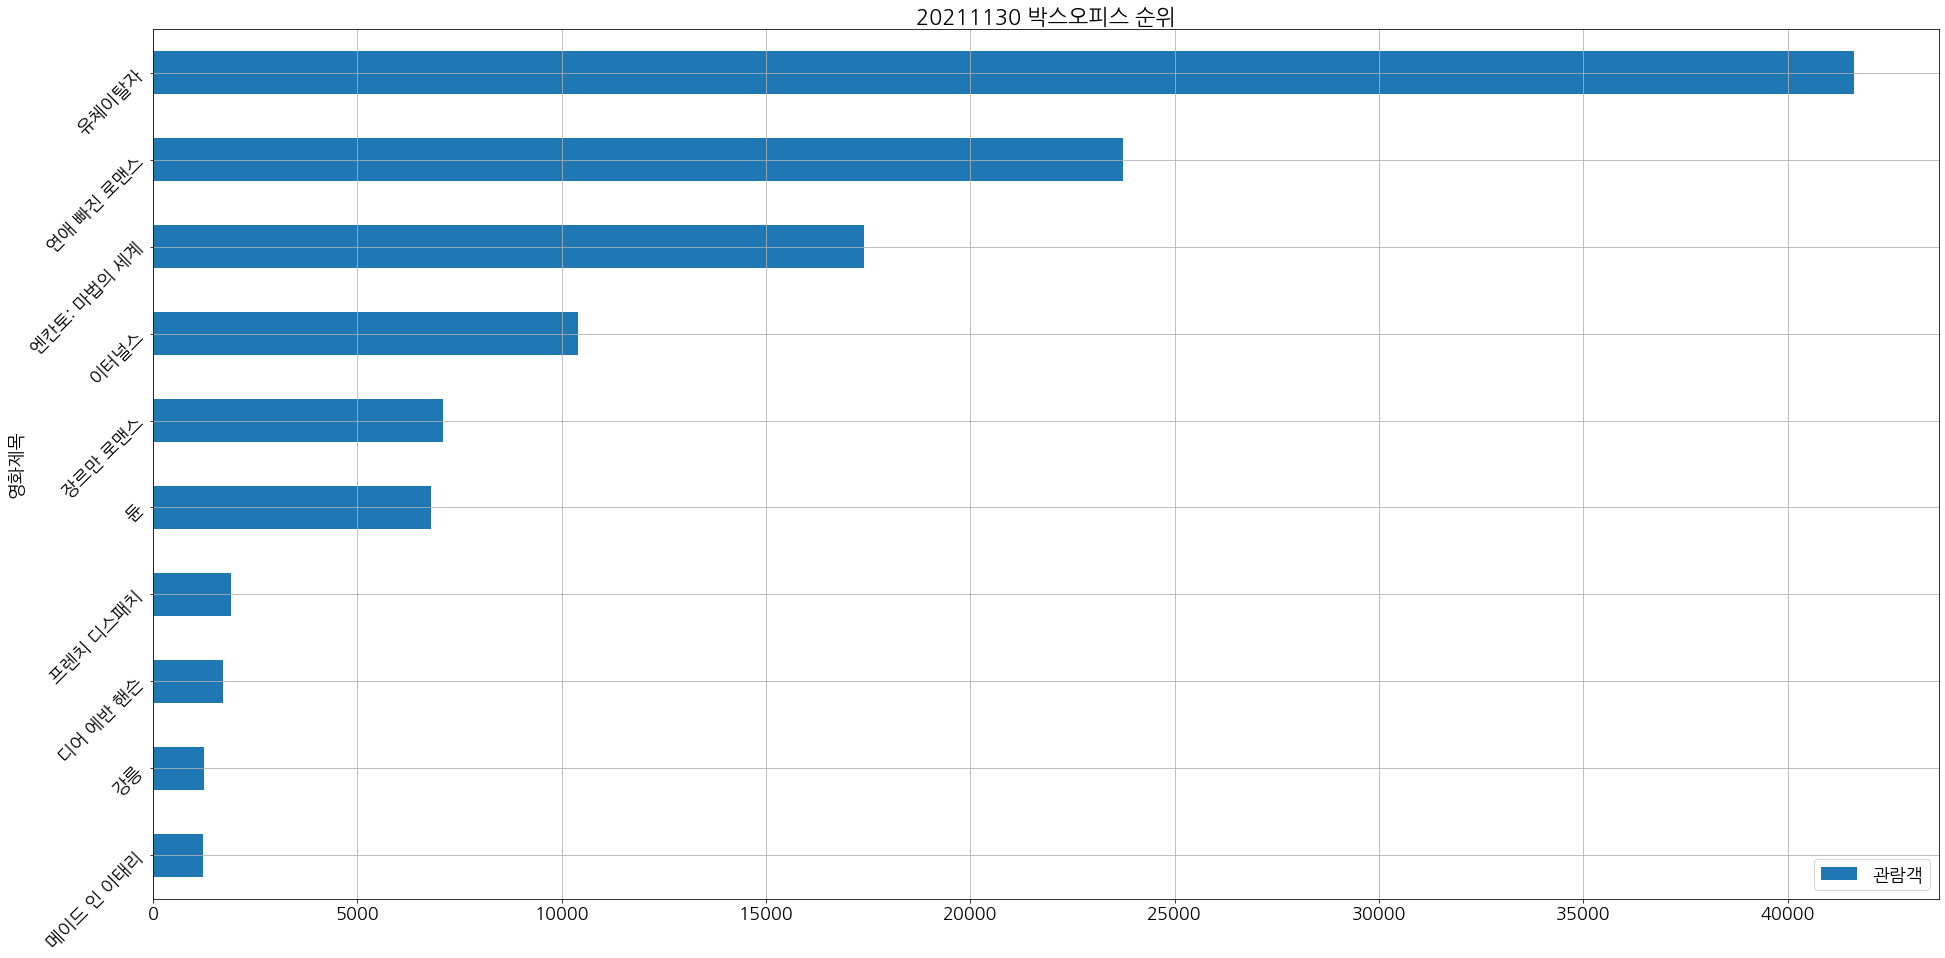

In [53]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (32, 16)

daily_rank_df.plot.barh(rot=45)
plt.grid()
plt.title("%s 박스오피스 순위" % yesterday_str)
plt.legend()
plt.show()
plt.close()

In [54]:
#일주일치 데이터 수집
영화관람객수_list = []
for i in range(-7, 0):
    today = dt.datetime.now()
    delta = dt.timedelta(days = i)
    yesterday = today + delta
    target_dt = yesterday.strftime("%Y%m%d")
    yesterday_str = yesterday.strftime("%y/%m/%d")
    
    api_url = url_tpl.format(key=api_key, date=target_dt)
    r = requests.get(api_url, headers=header_info)
    if r.status_code != 200:
        err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
        raise Exception(err_msg)

    r.encoding = "utf-8"
    #print(r.text)
    #print("-" * 50)
    
    daily_boxoffice_dict = json.loads(r.text)
    daily_boxoffice_list = daily_boxoffice_dict['boxOfficeResult']['dailyBoxOfficeList']
    #print(daily_boxoffice_list)
    #print("-" * 30)
    
    for boxoffice in daily_boxoffice_list:
        boxoffice['date'] = yesterday_str
    #print(daily_boxoffice_list)
    #print("-" * 30)
    
    영화관람객수_list +=daily_boxoffice_list

영화관람객수_list

[{'rnum': '1',
  'rank': '1',
  'rankInten': '0',
  'rankOldAndNew': 'NEW',
  'movieCd': '20196264',
  'movieNm': '유체이탈자',
  'openDt': '2021-11-24',
  'salesAmt': '507755990',
  'salesShare': '32.4',
  'salesInten': '507755990',
  'salesChange': '100',
  'salesAcc': '550592990',
  'audiCnt': '65464',
  'audiInten': '65464',
  'audiChange': '100',
  'audiAcc': '70194',
  'scrnCnt': '1103',
  'showCnt': '4728',
  'date': '21/11/24'},
 {'rnum': '2',
  'rank': '2',
  'rankInten': '23',
  'rankOldAndNew': 'OLD',
  'movieCd': '20210864',
  'movieNm': '엔칸토: 마법의 세계',
  'openDt': '2021-11-24',
  'salesAmt': '301421650',
  'salesShare': '19.2',
  'salesInten': '298827650',
  'salesChange': '11520',
  'salesAcc': '312828650',
  'audiCnt': '39436',
  'audiInten': '39146',
  'audiChange': '13498.6',
  'audiAcc': '40546',
  'scrnCnt': '852',
  'showCnt': '2755',
  'date': '21/11/24'},
 {'rnum': '3',
  'rank': '3',
  'rankInten': '0',
  'rankOldAndNew': 'NEW',
  'movieCd': '20205986',
  'movieNm': '연

In [55]:
df = DataFrame(영화관람객수_list)
df

,rnum,rank,rankInten,rankOldAndNew,movieCd,movieNm,openDt,salesAmt,salesShare,salesInten,salesChange,salesAcc,audiCnt,audiInten,audiChange,audiAcc,scrnCnt,showCnt,date
0,1,1,0,NEW,20196264,유체이탈자,2021-11-24,507755990,32.4,507755990,100,550592990,65464,65464,100,70194,1103,4728,21/11/24
1,2,2,23,OLD,20210864,엔칸토: 마법의 세계,2021-11-24,301421650,19.2,298827650,11520,312828650,39436,39146,13498.6,40546,852,2755,21/11/24
2,3,3,0,NEW,20205986,연애 빠진 로맨스,2021-11-24,251999520,16.1,251999520,100,327705520,32189,32189,100,40599,931,3744,21/11/24
3,4,4,-2,OLD,20218256,이터널스,2021-11-03,117845750,7.5,-79282790,-40.2,30283914700,15783,-4871,-23.6,2904749,686,1464,21/11/24
4,5,5,-4,OLD,20191243,장르만 로맨스,2021-11-17,120857230,7.7,-178413080,-59.6,4157614530,15610,-15276,-49.5,412381,684,1694,21/11/24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,6,6,0,OLD,20210087,듄,2021-10-20,66045400,5.8,10386650,18.7,15434004120,6803,1104,19.4,1434523,429,617,21/11/30
66,7,7,1,OLD,20210600,프렌치 디스패치,2021-11-18,19472760,1.7,2029320,11.6,716014280,1905,200,11.7,66136,147,197,21/11/30
67,8,8,1,OLD,20210244,디어 에반 핸슨,2021-11-17,16741970,1.5,1651430,10.9,1016059830,1710,143,9.1,100157,221,247,21/11/30
68,9,9,2,OLD,20203286,강릉,2021-11-10,11475300,1.0,4259100,59,3149879470,1251,502,67,304068,150,194,21/11/30


In [68]:
df2 = df.filter(['movieNm', 'date', 'audiCnt'])
df2

,movieNm,date,audiCnt
0,유체이탈자,21/11/24,65464
1,엔칸토: 마법의 세계,21/11/24,39436
2,연애 빠진 로맨스,21/11/24,32189
3,이터널스,21/11/24,15783
4,장르만 로맨스,21/11/24,15610
...,...,...,...
65,듄,21/11/30,6803
66,프렌치 디스패치,21/11/30,1905
67,디어 에반 핸슨,21/11/30,1710
68,강릉,21/11/30,1251


In [69]:
df2['audiCnt'] = df2['audiCnt'].apply(pd.to_numeric)
df2.dtypes

movieNm    object
date       object
audiCnt     int64
dtype: object

In [75]:
pivot_df = df2.pivot(index='date', columns='movieNm', values = 'audiCnt')
pivot_df

movieNm,강릉,귀멸의 칼날: 나타구모산 편,듄,디어 에반 핸슨,메이드 인 이태리,무녀도,뱅드림! 필름 라이브 세컨드 스테이지,엔칸토: 마법의 세계,연애 빠진 로맨스,유체이탈자,이터널스,장르만 로맨스,태일이,프렌치 디스패치,호빗: 스마우그의 폐허
date,,,,,,,,,,,,,,,
21/11/24,NaN,2149.0,7904.0,2395.0,NaN,NaN,NaN,39436.0,32189.0,65464.0,15783.0,15610.0,NaN,3116.0,1824.0
21/11/25,NaN,NaN,5929.0,2140.0,NaN,NaN,2235.0,25081.0,27268.0,43505.0,11321.0,10736.0,7617.0,2953.0,NaN
21/11/26,1319.0,NaN,8235.0,2275.0,2313.0,NaN,NaN,31643.0,31443.0,51333.0,15193.0,11289.0,NaN,3160.0,NaN
21/11/27,NaN,1685.0,16130.0,2850.0,NaN,NaN,1798.0,87843.0,56361.0,100186.0,25450.0,17498.0,NaN,3949.0,NaN
21/11/28,1726.0,1697.0,15104.0,2668.0,NaN,NaN,NaN,83417.0,53393.0,97202.0,23195.0,16686.0,NaN,3986.0,NaN
21/11/29,NaN,NaN,5699.0,1567.0,NaN,2065.0,NaN,16338.0,22583.0,36037.0,8367.0,8062.0,1520.0,1705.0,NaN
21/11/30,1251.0,NaN,6803.0,1710.0,1229.0,NaN,NaN,17398.0,23749.0,41614.0,10390.0,7104.0,NaN,1905.0,NaN


In [76]:
final_df = pivot_df.fillna(0)
final_df

movieNm,강릉,귀멸의 칼날: 나타구모산 편,듄,디어 에반 핸슨,메이드 인 이태리,무녀도,뱅드림! 필름 라이브 세컨드 스테이지,엔칸토: 마법의 세계,연애 빠진 로맨스,유체이탈자,이터널스,장르만 로맨스,태일이,프렌치 디스패치,호빗: 스마우그의 폐허
date,,,,,,,,,,,,,,,
21/11/24,0.0,2149.0,7904.0,2395.0,0.0,0.0,0.0,39436.0,32189.0,65464.0,15783.0,15610.0,0.0,3116.0,1824.0
21/11/25,0.0,0.0,5929.0,2140.0,0.0,0.0,2235.0,25081.0,27268.0,43505.0,11321.0,10736.0,7617.0,2953.0,0.0
21/11/26,1319.0,0.0,8235.0,2275.0,2313.0,0.0,0.0,31643.0,31443.0,51333.0,15193.0,11289.0,0.0,3160.0,0.0
21/11/27,0.0,1685.0,16130.0,2850.0,0.0,0.0,1798.0,87843.0,56361.0,100186.0,25450.0,17498.0,0.0,3949.0,0.0
21/11/28,1726.0,1697.0,15104.0,2668.0,0.0,0.0,0.0,83417.0,53393.0,97202.0,23195.0,16686.0,0.0,3986.0,0.0
21/11/29,0.0,0.0,5699.0,1567.0,0.0,2065.0,0.0,16338.0,22583.0,36037.0,8367.0,8062.0,1520.0,1705.0,0.0
21/11/30,1251.0,0.0,6803.0,1710.0,1229.0,0.0,0.0,17398.0,23749.0,41614.0,10390.0,7104.0,0.0,1905.0,0.0


In [77]:
final_df.dtypes

movieNm
강릉                      float64
귀멸의 칼날: 나타구모산 편         float64
듄                       float64
디어 에반 핸슨                float64
메이드 인 이태리               float64
무녀도                     float64
뱅드림! 필름 라이브 세컨드 스테이지    float64
엔칸토: 마법의 세계             float64
연애 빠진 로맨스               float64
유체이탈자                   float64
이터널스                    float64
장르만 로맨스                 float64
태일이                     float64
프렌치 디스패치                float64
호빗: 스마우그의 폐허            float64
dtype: object

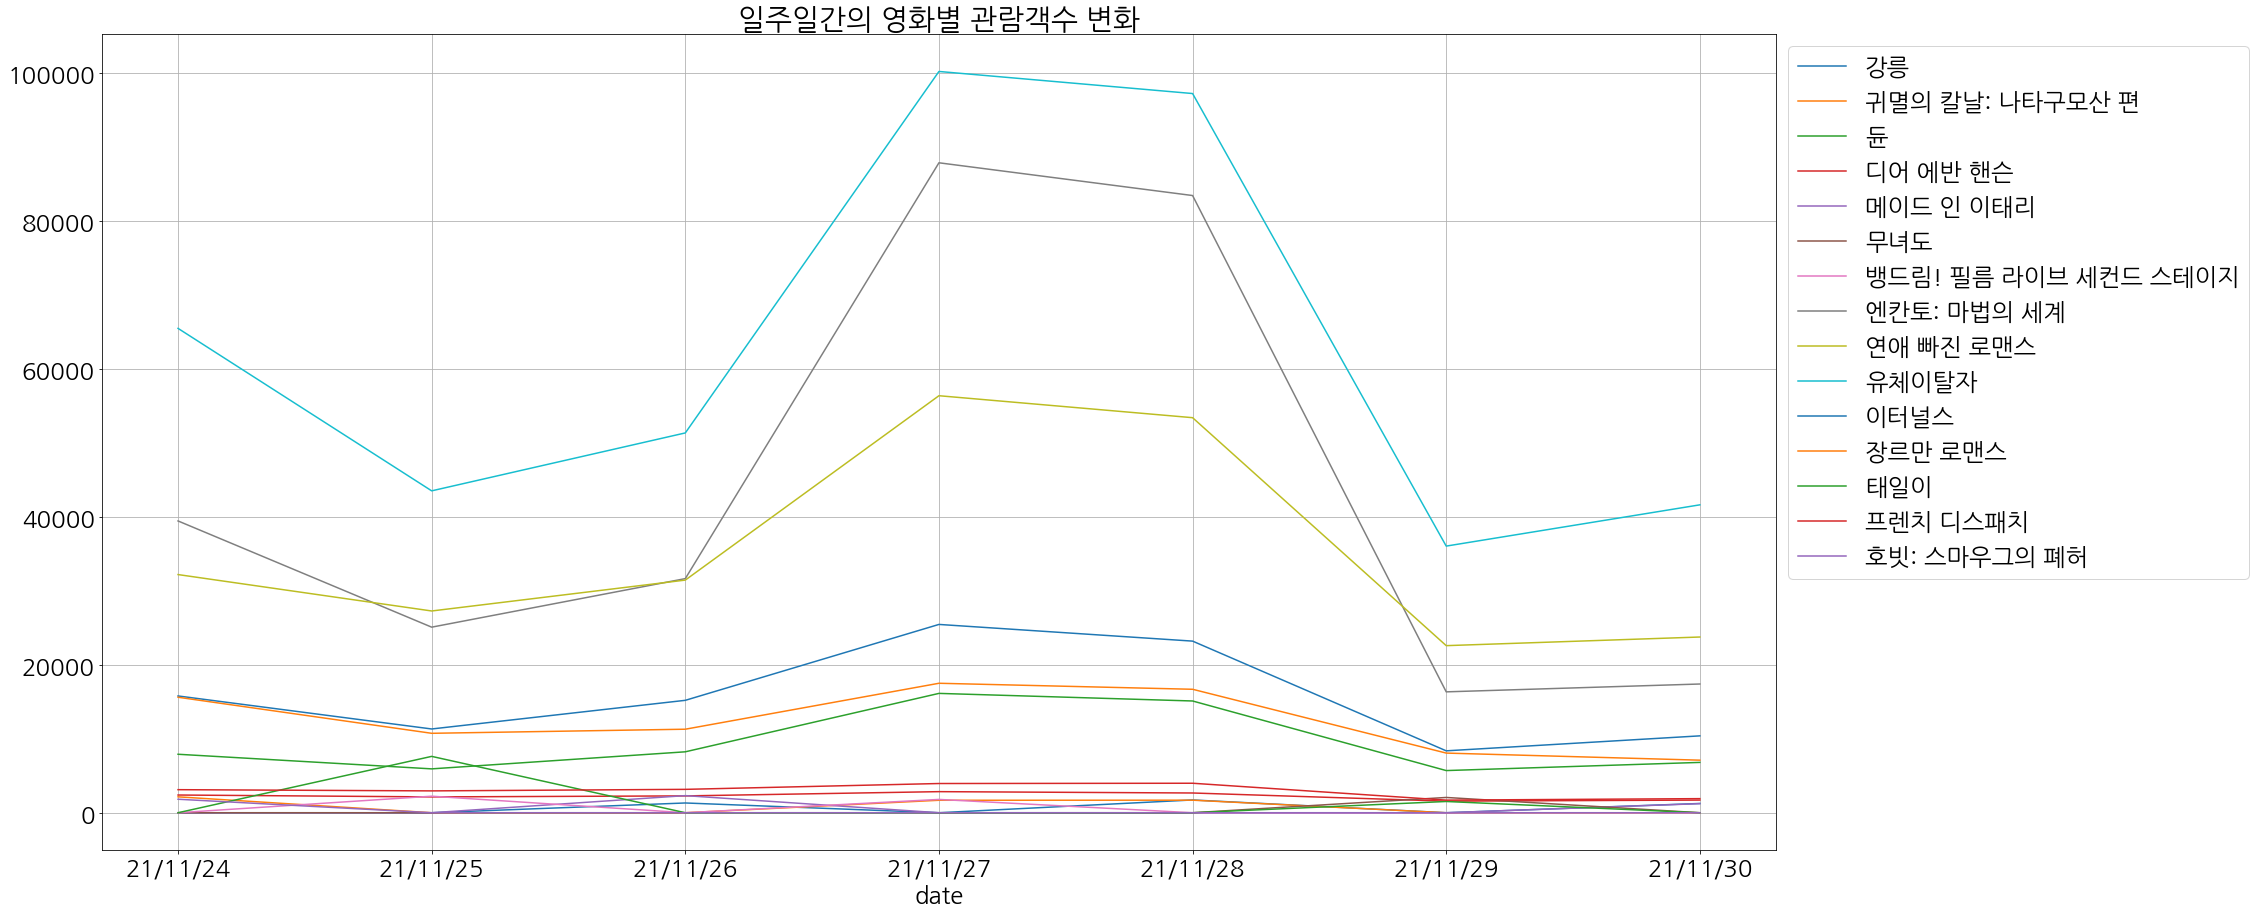

In [78]:
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["font.size"] = 24
plt.rcParams["figure.figsize"] = (30, 15)

final_df.plot(rot=0)
plt.grid()
plt.title("일주일간의 영화별 관람객수 변화")
plt.legend(bbox_to_anchor=(1,1))
plt.show()
plt.close()